In [14]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

import spectral as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd
import seaborn as sns

import hoggorm as ho
import hoggormplot as hop

# Analyse

### Load måle data

In [5]:
data_df = pd.read_csv('/Users/emilie/Documents/NMBUdatamaskin/NMBU/Vår2023/Murstein_data/Mursetin_Import_Data.csv', sep=";")

cols = data_df.columns
for col in cols:
    data_df[col] = data_df[col].astype(str).str.replace(",",".")
    data_df[col] = data_df[col].astype(str).str.replace(" ","").astype(float)
    
    

In [6]:
data_df

,Murstein nr.,Lengde,Bredde,Høyde,Brutto volum,Netto volum,Prosentvis hullandel,Tørr masse (varm),Tørr masse (romtemp),Brutto tørrdensitet,Netto tørrdensitet,Koeffisient A siden,Koeffisient B siden,Minuttsug,Prosentvis vannabsorpsjon,Porefyllingstall,FM,Trykkfasthet
0,1.0,24.15,11.40,6.05,0.001666,0.001603,0.04,2924.47,2924.88,1755.78,1823.94,2.2,1.9,2.0,0.14,0.93,0.76,32.7
1,2.0,22.10,10.25,6.20,0.001404,0.001102,0.22,2407.76,2407.99,1714.37,2185.57,0.4,0.5,0.4,0.03,0.54,0.15,49.5
2,3.0,22.20,10.05,6.25,0.001394,0.001035,0.26,2200.22,2200.44,1577.85,2125.08,0.4,0.3,0.4,0.07,0.84,0.25,22.4
3,4.0,24.40,11.55,6.50,0.001832,0.001651,0.10,2603.84,2604.39,1421.44,1577.53,3.6,2.6,3.1,0.24,0.90,1.07,12.0
4,5.0,22.35,10.20,6.65,0.001516,0.001219,0.20,2439.85,2440.11,1609.40,2001.27,1.5,1.2,1.3,0.08,0.70,0.43,15.6
5,6.0,24.00,11.20,6.45,0.001734,0.001641,0.05,3047.43,3048.43,1757.70,1856.72,2.5,2.4,2.4,0.13,0.88,0.75,45.7
6,7.0,24.90,11.85,6.30,0.001859,0.001393,0.25,2796.51,2796.04,1504.38,2007.39,0.5,0.7,0.6,0.06,0.64,0.23,53.3
7,8.0,23.30,10.85,6.65,0.001681,0.001501,0.11,2798.56,2798.95,1664.67,1864.51,2.8,2.4,2.6,0.15,0.90,0.81,28.4
8,9.0,24.15,11.55,6.45,0.001799,0.001685,0.06,3038.14,3038.60,1688.69,1802.86,2.7,2.7,2.7,0.14,0.90,0.83,40.9
9,10.0,23.85,11.40,6.35,0.001727,0.001583,0.08,3095.55,3095.41,1792.96,1955.64,1.7,1.6,1.6,0.09,0.76,0.51,55.8


In [7]:
murstein_id = data_df["Murstein nr."].values 

data_df = data_df.drop(["Murstein nr."], axis = 1)
data_df = data_df.drop([" FM "], axis = 1)
data_df = data_df.drop(["Koeffisient A siden"], axis = 1)
data_df = data_df.drop(["Koeffisient B siden"], axis = 1)
data_df = data_df.drop(["Tørr masse (varm)"], axis = 1)
data_df = data_df.drop(["Lengde"], axis = 1)
data_df = data_df.drop(["Bredde"], axis = 1)
data_df = data_df.drop(["Høyde"], axis = 1)
data_df = data_df.drop(["Brutto tørrdensitet"], axis = 1)
data_df = data_df.drop(["Brutto volum"], axis = 1)


In [8]:
data_df

,Netto volum,Prosentvis hullandel,Tørr masse (romtemp),Netto tørrdensitet,Minuttsug,Prosentvis vannabsorpsjon,Porefyllingstall,Trykkfasthet
0,0.001603,0.04,2924.88,1823.94,2.0,0.14,0.93,32.7
1,0.001102,0.22,2407.99,2185.57,0.4,0.03,0.54,49.5
2,0.001035,0.26,2200.44,2125.08,0.4,0.07,0.84,22.4
3,0.001651,0.10,2604.39,1577.53,3.1,0.24,0.90,12.0
4,0.001219,0.20,2440.11,2001.27,1.3,0.08,0.70,15.6
5,0.001641,0.05,3048.43,1856.72,2.4,0.13,0.88,45.7
6,0.001393,0.25,2796.04,2007.39,0.6,0.06,0.64,53.3
7,0.001501,0.11,2798.95,1864.51,2.6,0.15,0.90,28.4
8,0.001685,0.06,3038.60,1802.86,2.7,0.14,0.90,40.9
9,0.001583,0.08,3095.41,1955.64,1.6,0.09,0.76,55.8


## Load spekter data

In [9]:
grid_spectra_df_REP = pd.read_csv('/Users/emilie/Documents/NMBUdatamaskin/NMBU/Vår2023/Kode/KUTTET_data/Grid_A_side_KUTTET.csv', sep=",")


## Formater y data


In [10]:
data_for_REP_df = pd.DataFrame()

for col in data_df.columns:
    y_dict={} 

    for i in range(17):
        y_dict[murstein_id[i]] = data_df[col][i] # assigning data frame from list to key in dictionary

    y_vals = []

    for element in grid_spectra_df_REP["Murstein nr"]:
        y_vals.append(y_dict[element])
        
    data_for_REP_df[col] = y_vals

In [11]:
data_for_REP_df

,Netto volum,Prosentvis hullandel,Tørr masse (romtemp),Netto tørrdensitet,Minuttsug,Prosentvis vannabsorpsjon,Porefyllingstall,Trykkfasthet
0,0.001603,0.04,2924.88,1823.94,2.0,0.14,0.93,32.7
1,0.001603,0.04,2924.88,1823.94,2.0,0.14,0.93,32.7
2,0.001603,0.04,2924.88,1823.94,2.0,0.14,0.93,32.7
3,0.001603,0.04,2924.88,1823.94,2.0,0.14,0.93,32.7
4,0.001603,0.04,2924.88,1823.94,2.0,0.14,0.93,32.7
...,...,...,...,...,...,...,...,...
199,0.001510,0.07,3140.50,2080.27,0.8,0.04,0.49,37.4
200,0.001510,0.07,3140.50,2080.27,0.8,0.04,0.49,37.4
201,0.001510,0.07,3140.50,2080.27,0.8,0.04,0.49,37.4
202,0.001510,0.07,3140.50,2080.27,0.8,0.04,0.49,37.4


## Hoggorm analyse

In [12]:
# Get the values from the data frame
X = grid_spectra_df_REP.iloc[:,21:-21].values
Y = data_for_REP_df.values

# Get the variable or columns names
X_varNames = list(grid_spectra_df_REP.iloc[:,21:-21].columns)
Y_varNames = list(data_for_REP_df.columns)

# Get the object or row names
X_objNames = list(grid_spectra_df_REP['Murstein nr'])
Y_objNames = list(data_for_REP_df.index)



In [15]:
model = ho.nipalsPLS2(arrX=X, Xstand=False, 
                      arrY=Y, Ystand=True,
                      cvType=["loo"], 
                      numComp=4)

loo


In [16]:
loadings = model.X_loadings()
scores = model.X_scores()

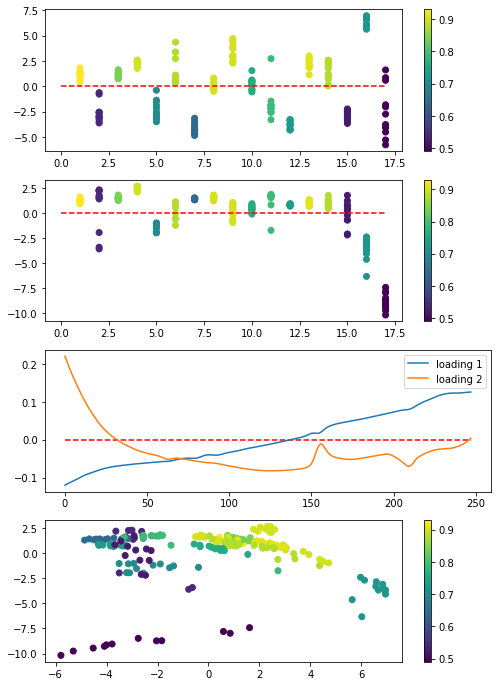

In [17]:
fig = plt.figure(figsize = (8,12))
fig.clf()
ax = fig.add_subplot(4,1,1)
img = ax.scatter(X_objNames, scores[:,0], c = data_for_REP_df["Porefyllingstall"]) 
 
fig.colorbar(img)


plt.plot(np.zeros(18), '--', color = 'r')


ax = fig.add_subplot(4,1,2)
img = ax.scatter(X_objNames, scores[:,1], c = data_for_REP_df["Porefyllingstall"]) 

fig.colorbar(img)


plt.plot(np.zeros(18), '--', color = 'r')


ax = fig.add_subplot(4,1,3)
plt.plot(np.zeros(len(loadings[:,0])), '--', color = 'r')
plt.plot(loadings[:,0], label = 'loading 1')
plt.plot(loadings[:,1], label = 'loading 2')
plt.legend()

ax = fig.add_subplot(4,1,4)
img = ax.scatter(scores[:,0], scores[:,1], c = data_for_REP_df["Porefyllingstall"])
fig.colorbar(img)

plt.show()

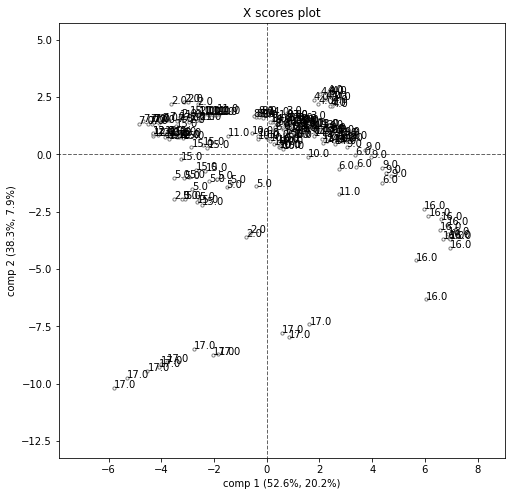

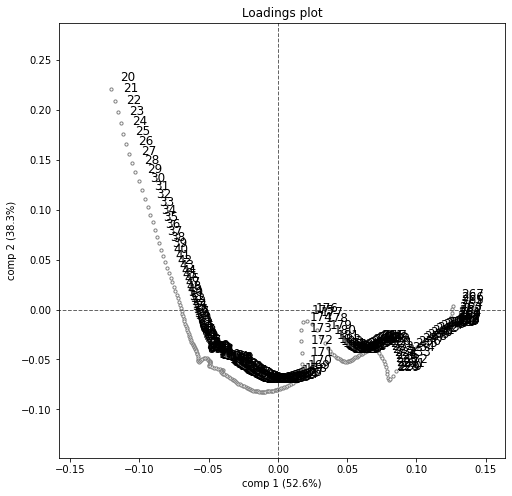

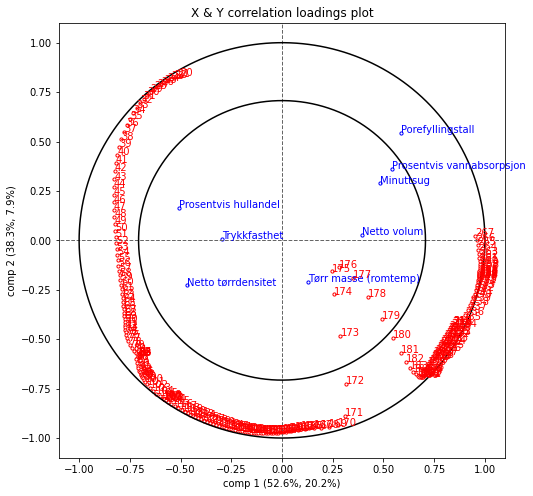

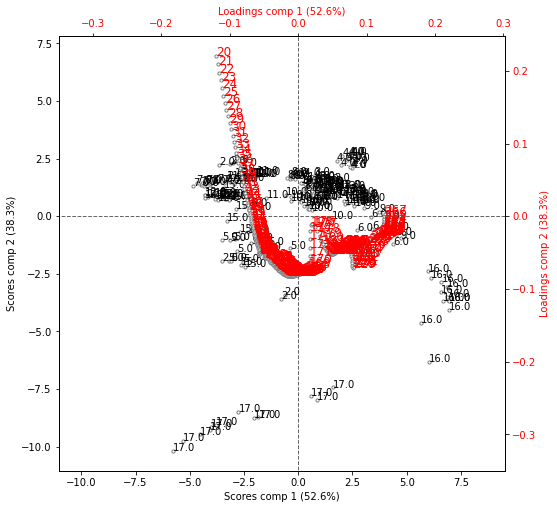

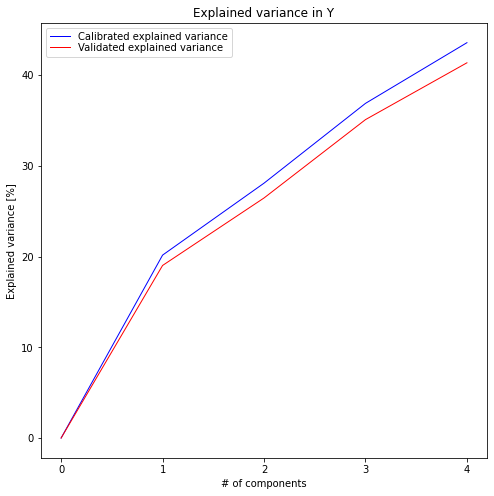

In [18]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6],
         objNames=X_objNames, 
         XvarNames=X_varNames,
         YvarNames=list(data_for_REP_df.columns), 
        figsize = (8,8))

# Prediksjon

### Last inn spektrale data som skal trenes og testes på

In [19]:
spectra_df_A = pd.read_csv('/Users/emilie/Documents/NMBUdatamaskin/NMBU/Vår2023/Kode/KUTTET_data/Grid_A_side_KUTTET.csv', sep = ",")
spectra_df_REP = pd.read_csv('/Users/emilie/Documents/NMBUdatamaskin/NMBU/Vår2023/Kode/Represent_sider_data/Grid_representative_sider_tørket.csv', sep = ",")


Slå sammen datasett og fjern murstein nr. 16 og 17

In [20]:
frames = [spectra_df_A.iloc[:-24,:], spectra_df_REP.iloc[:-24,:]]

spectra_df_full = pd.concat(frames)



Formater y variabel

In [22]:
data_df = pd.read_csv('/Users/emilie/Documents/NMBUdatamaskin/NMBU/Vår2023/Murstein_data/Mursetin_Import_Data.csv', sep=";")

cols = data_df.columns
for col in cols:
    data_df[col] = data_df[col].astype(str).str.replace(",",".")
    data_df[col] = data_df[col].astype(str).str.replace(" ","").astype(float)
    
    

In [23]:
y_dict={} 

for i in range(17):
    y_dict[data_df["Murstein nr."][i]] = data_df["Porefyllingstall"][i] # assigning data frame from list to key in dictionary

y_vals = []

for element in spectra_df_full["Murstein nr"]:
    y_vals.append([y_dict[float(element)]])

Del opp i test og tren sett

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spectra_df_full.iloc[:,21:-21].values, y_vals, test_size=0.33, random_state=2)


Tren PLS modell

In [25]:
pls = PLSRegression(n_components = 7, scale = False)
pls.fit(X_train, y_train)

PLSRegression(n_components=7, scale=False)

Beregn ytelsen til modellen på test settet

In [26]:
pls.score(X_test, y_test)

0.7815067157260744

In [28]:
y_pred = pls.predict(X_test)

In [29]:
mean_squared_error(y_pred, y_test)

0.004000505419096654

In [30]:
def pore_accuracy(model, X_test, y_test):
    
    true_pred = 0
    
    y_pred = model.predict(X_test)
    
    for pred, test in zip(y_pred, y_test):
        if ((pred[0] < 0.8) & (test[0] < 0.8)) or ((pred[0] > 0.8) & (test[0] > 0.8)):
            true_pred += 1
            
    return true_pred/len(y_test)

In [31]:
pore_accuracy(pls, X_test, y_test)

0.8571428571428571

/var/folders/g8/mf2s8g352jqg1_cpwxd_z6dc0000gn/T/ipykernel_1127/4000822400.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y_test, y_test, '-g', label = "Forventet regresjonslinje", linewidth=3, c = "red")


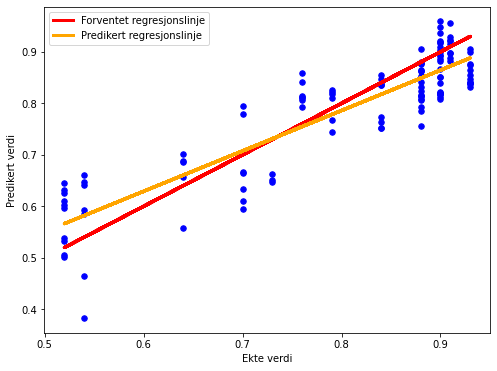

In [32]:
y_test_flat = [j for y_test in y_test for j in y_test]

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s = 30, c = "blue")
plt.plot(y_test, y_test, '-g', label = "Forventet regresjonslinje", linewidth=3, c = "red")
z = np.polyfit(y_test_flat, y_pred, 1)
plt.plot(y_test, np.polyval(z, y_test), color='orange', label='Predikert regresjonslinje', linewidth=3)
plt.xlabel("Ekte verdi")
plt.ylabel("Predikert verdi")
plt.legend()
plt.show()

Gjenta for å teste modellen på ny data som er usett av modellen

In [33]:
UKUTTET_spektra_df = pd.read_csv('/Users/emilie/Documents/NMBUdatamaskin/NMBU/Vår2023/Kode/KUTTET_data/Grid_B_side_KUTTET.csv', sep = ",")

UKUTTET_spektra_df = UKUTTET_spektra_df.iloc[:-24,:]


In [34]:
y_dict={} 

for i in range(17):
    y_dict[data_df["Murstein nr."][i]] = data_df["Porefyllingstall"][i]
y_vals_UKUTTET = []

for element in UKUTTET_spektra_df["Murstein nr"]:
    y_vals_UKUTTET.append([y_dict[float(element)]])
    
UKUTTET_spektra_df = UKUTTET_spektra_df.iloc[:,21:-21]

In [35]:
y_pred = pls.predict(UKUTTET_spektra_df.values)

In [36]:
pls.score(UKUTTET_spektra_df.values, y_vals_UKUTTET)

0.6602655713717736

In [37]:
mean_squared_error(y_pred, y_vals_UKUTTET)

0.005876046677553805

In [38]:
accuracy = pore_accuracy(pls, UKUTTET_spektra_df.values, y_vals_UKUTTET)
accuracy

0.8277777777777777